# This notebook is to demonstrate EDA for the university student data

### Data Description

Private A factor with levels No and Yes indicating private or public university

Apps Number of applications received

Accept Number of applications accepted

Enroll Number of new students enrolled

Top10perc Pct. new students from top 10% of H.S. class

Top25perc Pct. new students from top 25% of H.S. class

F.Undergrad Number of fulltime undergraduates

P.Undergrad Number of parttime undergraduates

Outstate Out-of-state tuition

Room.Board Room and board costs

Books Estimated book costs

Personal Estimated personal spending

PhD Pct. of faculty with Ph.D.’s

Terminal Pct. of faculty with terminal degree

S.F.Ratio Student/faculty ratio

perc.alumni Pct. alumni who donate

Expend Instructional expenditure per student

Grad.Rate Graduation rate

include the required libraries

In [1]:
import pandas as pd
import os
import subprocess

pull the data from kaggle

In [14]:
# Set Kaggle username and API key directly
os.environ['KAGGLE_USERNAME'] = 'rmramasamy'
os.environ['KAGGLE_KEY'] = 'f18d9e3735749a8bfd36e9ecb2cfdb13'
dataset_url = "tarekmuhammed/university-students-data"
subprocess.run(["kaggle", "datasets", "download", "-d", dataset_url, "--unzip"])
df = pd.read_csv('Kmeans_assignment_data.csv')

In [15]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


### Data cleaning

In [17]:
from scipy import stats

# Calculate Z-scores for each column
z_scores = stats.zscore(df.select_dtypes(include=[float, int]))

# Filter out rows with Z-scores greater than 3 or less than -3
df_filtered = df[(z_scores < 3).all(axis=1)]

df_filtered.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Initialize the KMeans model
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model to the data
kmeans.fit(df_filtered.select_dtypes(include=[float, int]))

# Predict the clusters
clusters = kmeans.predict(df_filtered.select_dtypes(include=[float, int]))

# Impute missing values with the mean of the cluster
df_imputed = df_filtered.copy()
for col in df_filtered.select_dtypes(include=[float, int]).columns:
	for cluster in np.unique(clusters):
		cluster_mean = df_filtered.loc[clusters == cluster, col].mean()
		df_imputed.loc[(clusters == cluster) & (df_filtered[col].isnull()), col] = cluster_mean

df_imputed.head()

In [28]:
df_imputed['Private'] = df_imputed['Private'].map({'Yes': 1, 'No': 0})
df_imputed.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,Adelphi University,1,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,Adrian College,1,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,Agnes Scott College,1,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,Alaska Pacific University,1,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0


### Data Transformation
performing feature importace analysis using xgboost and dimensionality reduction

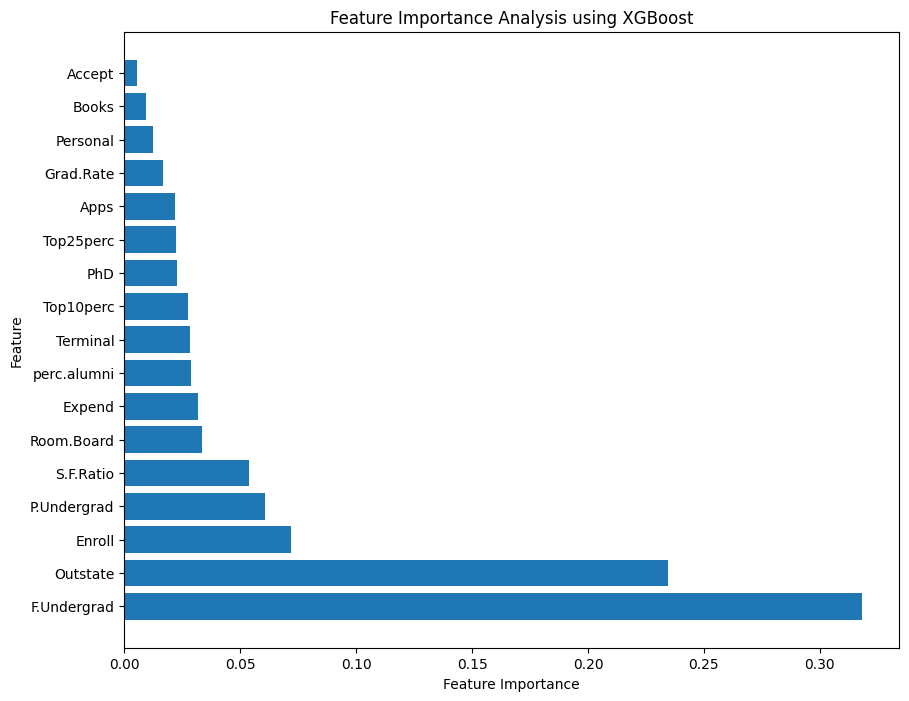

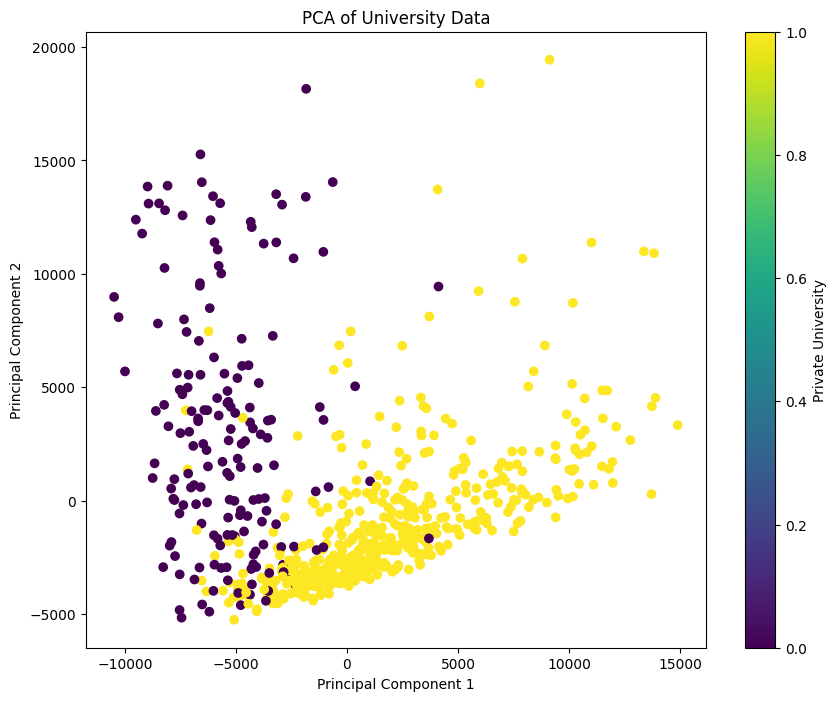

In [37]:
import xgboost as xgb
from sklearn.decomposition import PCA
import seaborn as sns

import matplotlib.pyplot as plt

# Prepare the data
X = df_imputed.drop(columns=['Unnamed: 0', 'Private'])
y = df_imputed['Private']

# Train an XGBoost model
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X, y)

# Extract feature importances
# Extract and sort feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
features = features[sorted_indices]
feature_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis using XGBoost')
plt.show()

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the PCA result
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of University Data')
plt.colorbar(label='Private University')
plt.show()



In [40]:
features[0:5]

Index(['F.Undergrad', 'Outstate', 'Enroll', 'P.Undergrad', 'S.F.Ratio'], dtype='object')

In [41]:
# List the principal components
principal_components = pca.components_
print("Principal Components:\n", principal_components)

# List the top 5 important features
top_5_features = features[0:5]
top_5_importances = feature_importances[0:5]
print("\nTop 5 Important Features:")
for feature, importance in zip(top_5_features, top_5_importances):
    print(f"{feature}: {importance}")

Principal Components:
 [[-7.04528643e-02 -6.01415732e-02 -4.60057700e-02  1.58966875e-03
   1.67236528e-03 -2.77196298e-01 -7.03588149e-02  7.35092838e-01
   1.37280245e-01  5.20689186e-04 -4.20139600e-02  1.05773756e-03
   1.07828840e-03 -4.56783840e-04  1.35719158e-03  5.88667701e-01
   1.61099138e-03]
 [ 5.31790736e-01  3.52011937e-01  1.32654954e-01  9.64081170e-04
   1.32126251e-03  6.87876269e-01  9.51748522e-02  1.33478785e-01
   5.28411519e-02  4.85337353e-03  2.88237852e-02  1.69064741e-03
   1.53727119e-03  8.08309600e-05 -2.14531372e-04  2.68301184e-01
   4.95828481e-04]]

Top 5 Important Features:
F.Undergrad: 0.31837326288223267
Outstate: 0.23432302474975586
Enroll: 0.07177963852882385
P.Undergrad: 0.06073174998164177
S.F.Ratio: 0.05392170324921608


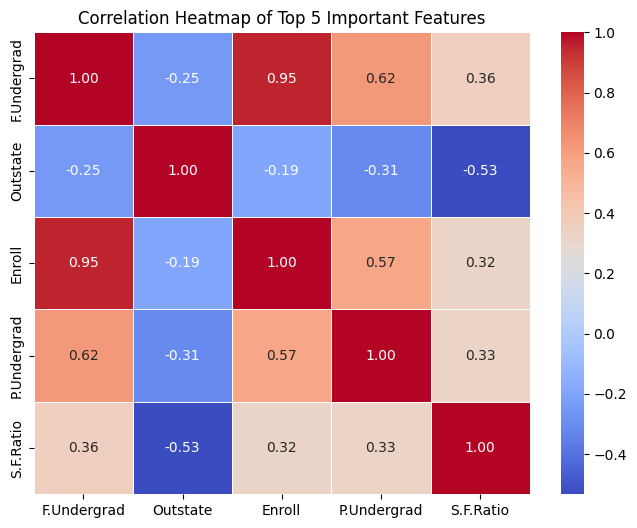

In [46]:
# Select only the top 5 important features
top_5_features_df = df_imputed[top_5_features]

# Generate the correlation matrix
corr_matrix_top_5 = top_5_features_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_top_5, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Top 5 Important Features')
plt.show()


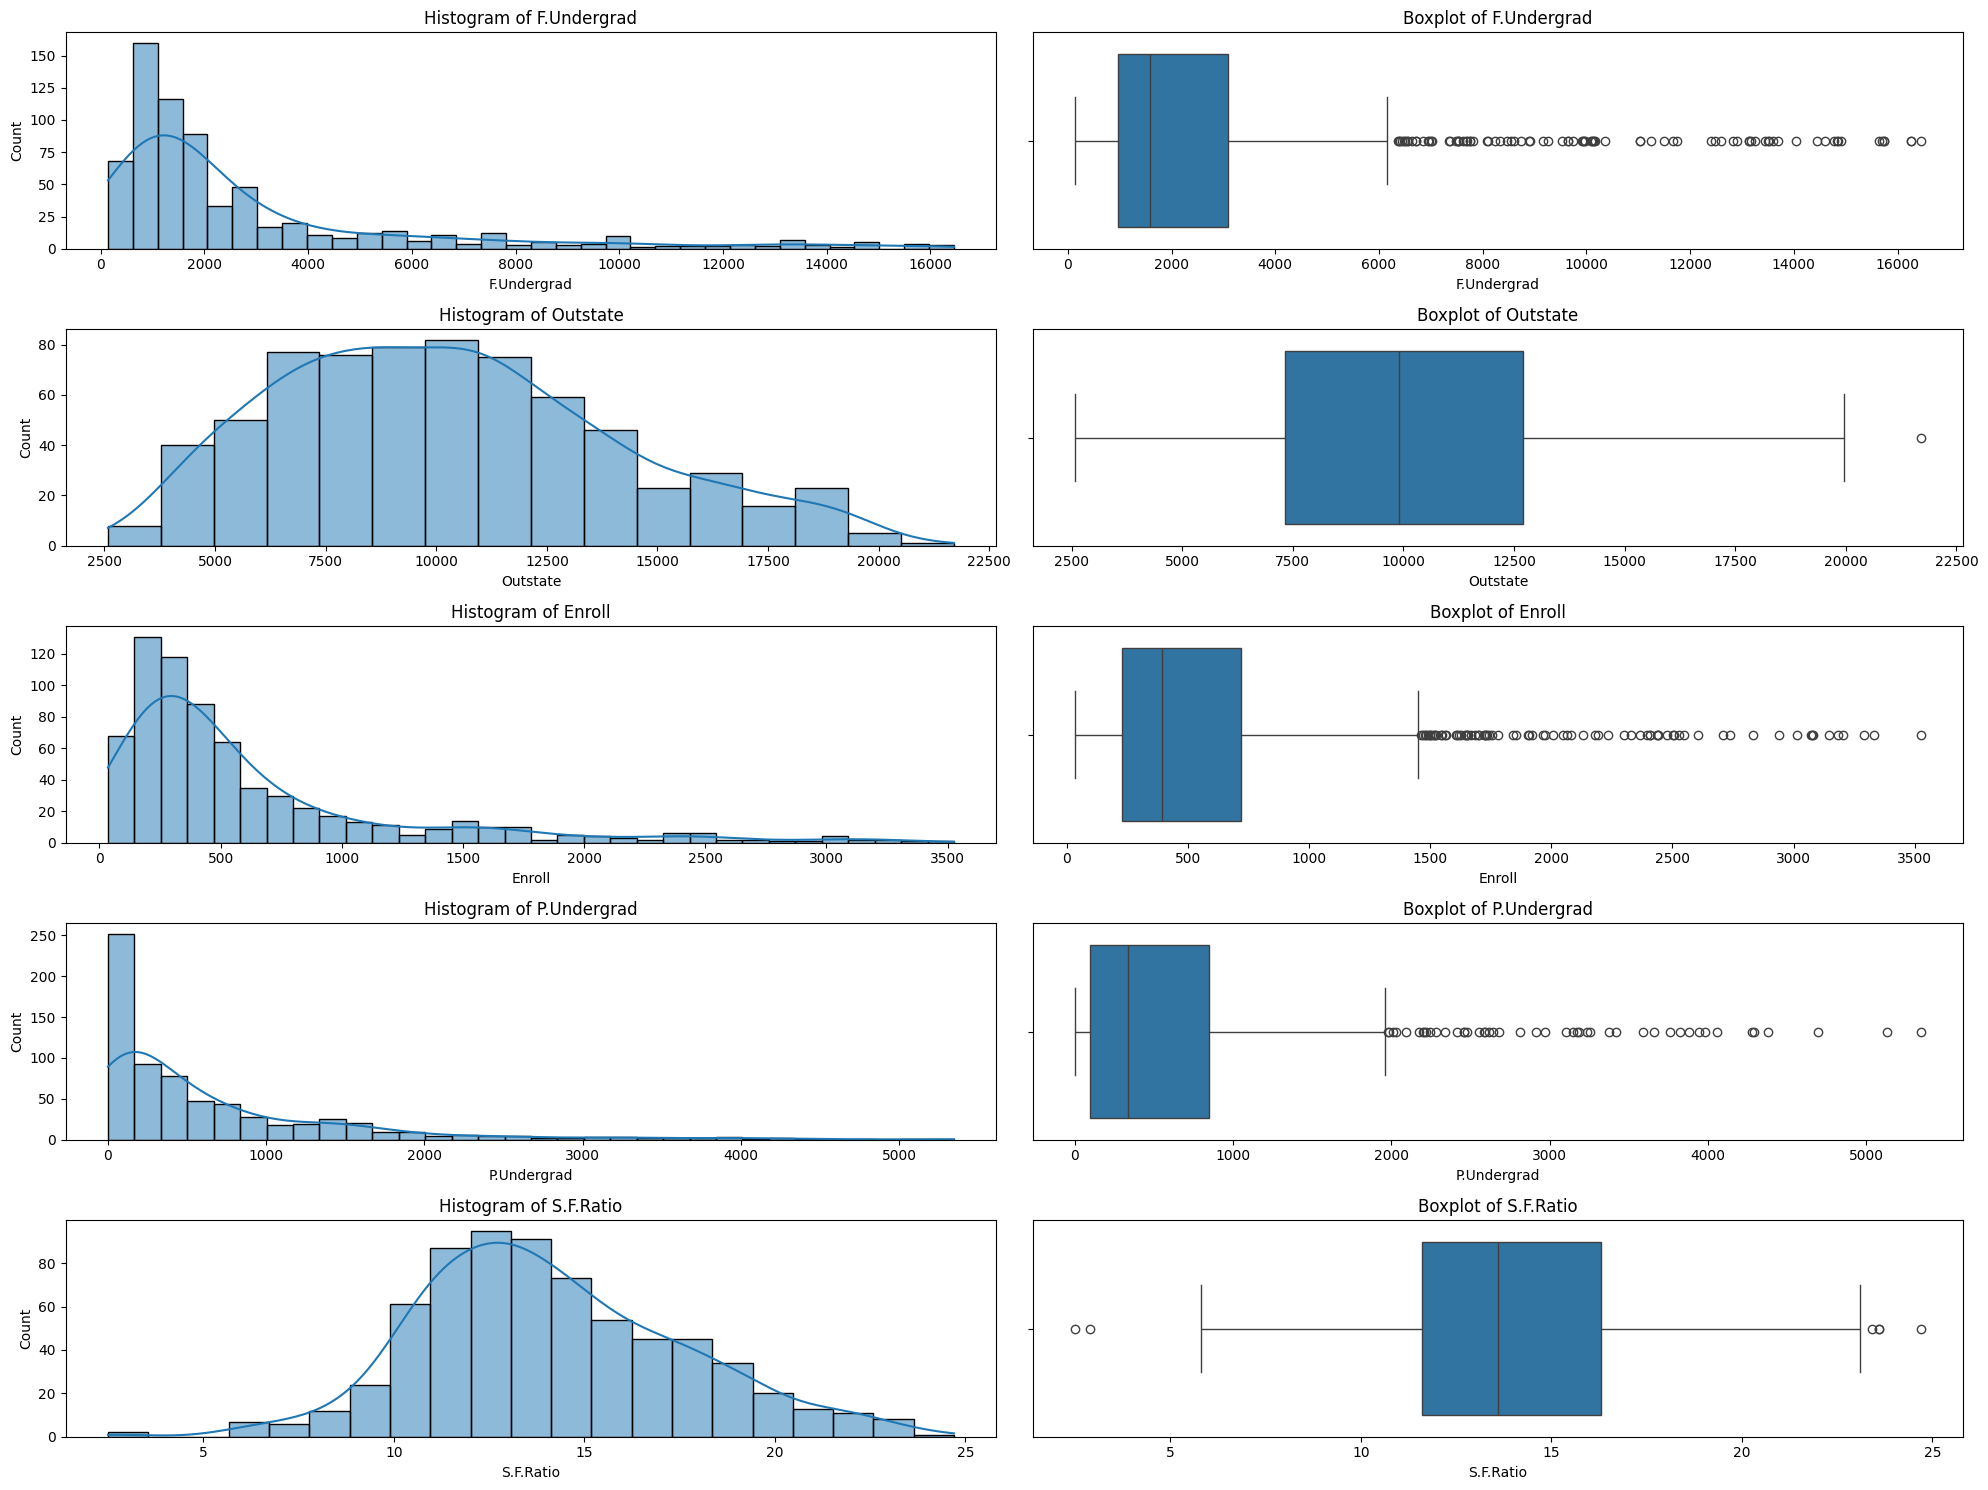

In [43]:
# Univariate analysis for the top 5 important features
top_5_features = ['F.Undergrad', 'Outstate', 'Enroll', 'P.Undergrad', 'S.F.Ratio']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(top_5_features, 1):
    plt.subplot(5, 2, 2*i-1)
    sns.histplot(df_imputed[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    
    plt.subplot(5, 2, 2*i)
    sns.boxplot(x=df_imputed[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

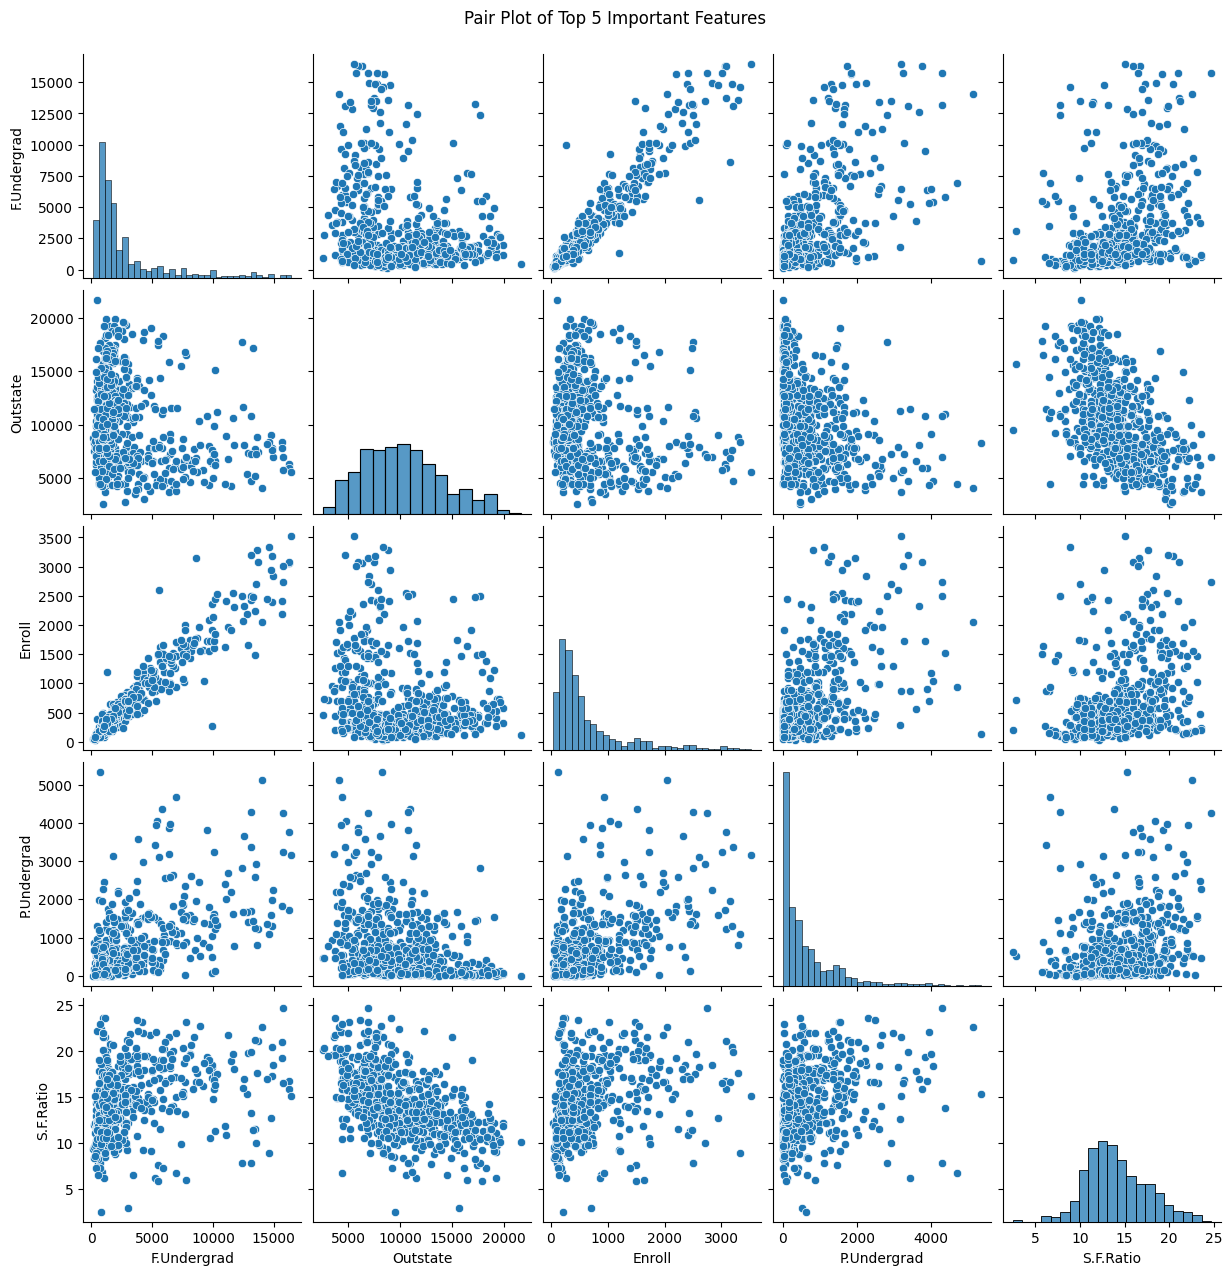

In [44]:
# Pair plot for the top 5 important features
sns.pairplot(top_5_features_df)
plt.suptitle('Pair Plot of Top 5 Important Features', y=1.02)
plt.show()

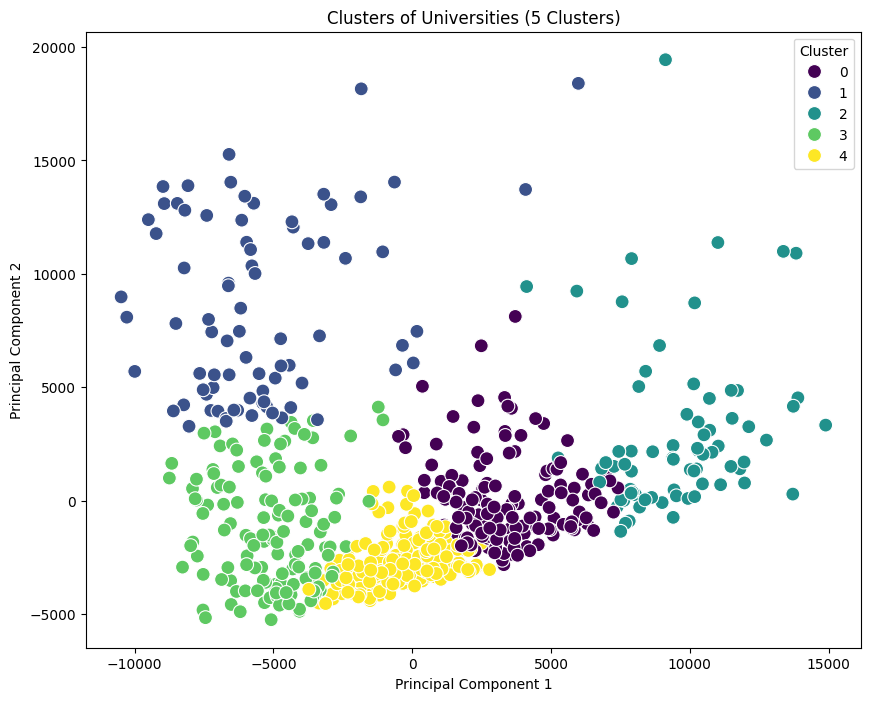

In [49]:
# Initialize the KMeans model with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=0)

# Fit the model to the data
kmeans_5.fit(df_imputed.select_dtypes(include=[float, int]))

# Predict the clusters
clusters_5 = kmeans_5.predict(df_imputed.select_dtypes(include=[float, int]))

# Add the cluster labels to the dataframe
df_imputed['Cluster_5'] = clusters_5

df_imputed.head()
# Plot the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_5, palette='viridis', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters of Universities (5 Clusters)')
plt.legend(title='Cluster')
plt.show()